In [44]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [237]:
assets_path = '/content/drive/MyDrive/CV_Exercise_Assets/Exercise1_Assets/1.1/'

In [90]:
#learnt and implimented the way to add grid on an image using the cv.line function. source: https://gist.github.com/mathandy/389ddbad48810d188bdc997c3a1dab0c
def importAndGrid(imageFile):
  image = cv.imread(assets_path + imageFile, cv.IMREAD_COLOR)
  originalImage = np.copy(image)
  h, w, = image.shape[:2]
  grid_shape=(25,25)
  rows, cols = grid_shape
  dy, dx = h / rows, w / cols

  # drawing vertical lines
  for x in np.linspace(start=dx, stop=w-dx, num=cols-1):
      x = int(round(x))
      cv.line(image, (x, 0), (x, h), color= (255,0,0), thickness=2)

  # drawing horizontal lines
  for y in np.linspace(start=dy, stop=h-dy, num=rows-1):
      y = int(round(y))
      cv.line(image, (0, y), (w, y), color= (255,0,0), thickness=2)

  return image, originalImage


In [91]:
def addPoints(imageFile, mySourcePoints, myDestinationPoints):
  image, originalImage = importAndGrid(imageFile)
  #Code from provided tutorial
  copied = np.copy(image)
  def drawCircle(image, p, color):
    cv.circle(image, p, 15, color = color, thickness = -1)

  new_extent = [0, 50, 50, 0]

  # Calculating the scaling factors because new extent has been placed for convenience. Implementation help from ChatGPT
  x_scale = (new_extent[1] - new_extent[0]) / image.shape[1]
  y_scale = (new_extent[2] - new_extent[3]) / image.shape[0]

  # Draw blue points on the image. Blue points are source points.
  p1 = mySourcePoints[0]
  p2 = mySourcePoints[1]
  p3 = mySourcePoints[2]
  p4 = mySourcePoints[3]

  #converting points selected after using new extent back to original co-ordinates in the image
  original_points_source = [(int(point[0] / x_scale), int(point[1] / y_scale)) for point in [p1,p2,p3,p4]]

  for p in original_points_source:
    drawCircle(copied, p, color=(0, 0, 255))

  # Draw green points on the image. Green points are destination points.
  d1 = myDestinationPoints[0]
  d2 = myDestinationPoints[1]
  d3 = myDestinationPoints[2]
  d4 = myDestinationPoints[3]

  original_points_destination = [(int(point[0] / x_scale), int(point[1] / y_scale)) for point in [d1,d2,d3,d4]]

  for p in original_points_destination:
    drawCircle(copied, p, color=(0, 255, 0))

  return copied, originalImage, original_points_source, original_points_destination

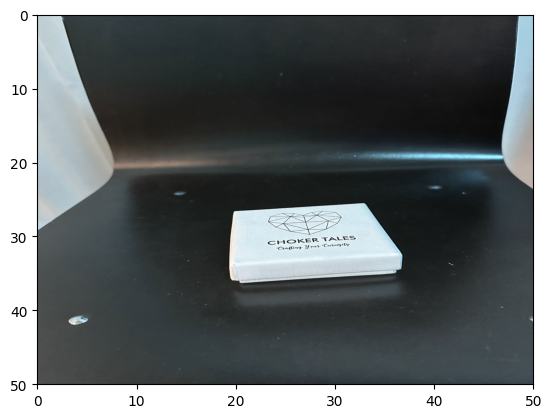

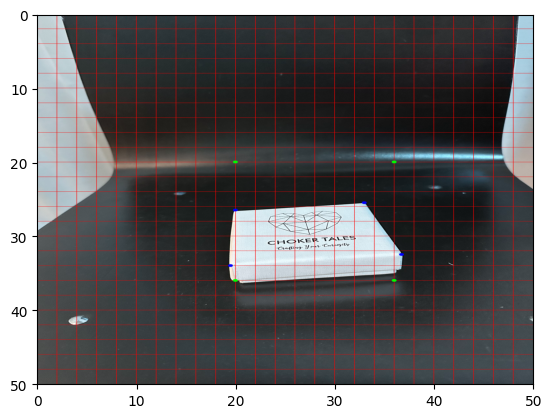

In [150]:
#Image 1
imageFile = "IMG_1930.jpg"

# Initially I set these points to (0,0) to visualise the image first and gradually change values/co-ordinates to my needs
msp1 = (20, 26.5)
msp2 = (33, 25.5)
msp3 = (19.5, 34)
msp4 = (36.75, 32.5)

mySourcePoints = [msp1, msp2, msp3, msp4]

mdp1 = (20, 20)
mdp2 = (36, 20)
mdp3 = (20, 36)
mdp4 = (36, 36)

myDestinationPoints = [mdp1, mdp2, mdp3, mdp4]

pointsImage, originalImage, original_points_source, original_points_destination = addPoints(imageFile, mySourcePoints, myDestinationPoints)

plt.imshow(originalImage, aspect = "auto", extent = [0, 50, 50, 0])
plt.figure()
plt.imshow(pointsImage, aspect = "auto", extent = [0, 50, 50, 0])

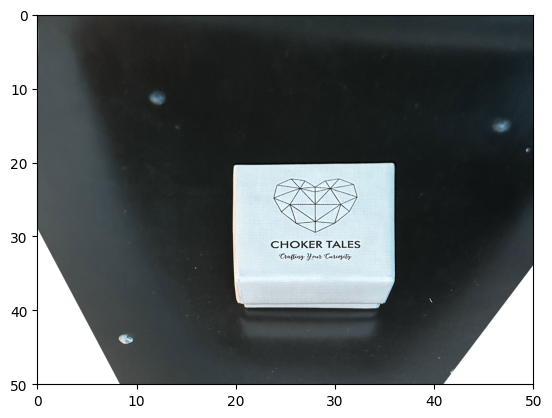

In [93]:
# Apply projective transformation.
source = np.float32(original_points_source)
destination = np.float32(original_points_destination)
M = cv.getPerspectiveTransform(source, destination)
h, w = originalImage.shape[:2]
correctedImage = cv.warpPerspective(originalImage, M, (w, h), borderValue=(255, 255, 255))
plt.imshow(correctedImage, aspect = "auto", extent = [0, 50, 50, 0])


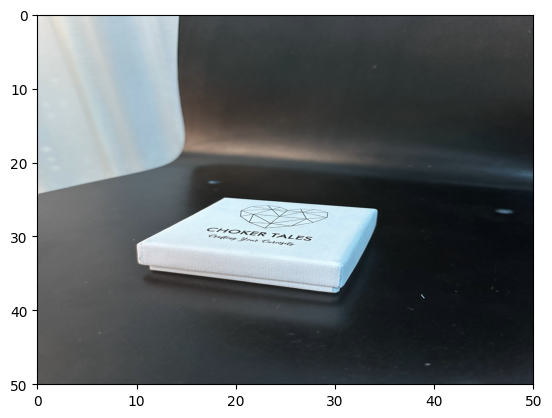

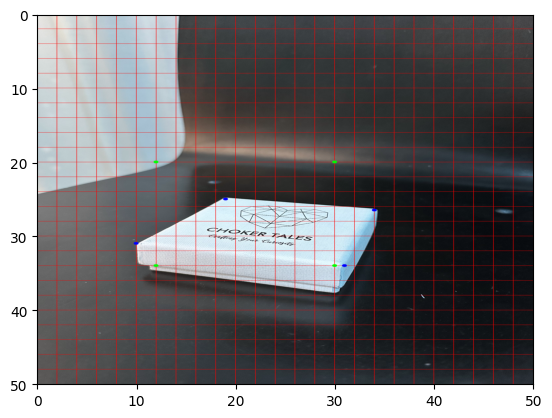

In [151]:
#Image 2
imageFile = "IMG_1929.jpg"

# Initially I set these points to (0,0) to visualise the image first and gradually change values/co-ordinates to my needs
msp1 = (19, 25)
msp2 = (34, 26.5)
msp3 = (10, 31)
msp4 = (31, 34)

mySourcePoints = [msp1, msp2, msp3, msp4]

mdp1 = (12, 20)
mdp2 = (30, 20)
mdp3 = (12, 34)
mdp4 = (30, 34)

myDestinationPoints = [mdp1, mdp2, mdp3, mdp4]

pointsImage, originalImage, original_points_source, original_points_destination = addPoints(imageFile, mySourcePoints, myDestinationPoints)

plt.imshow(originalImage, aspect = "auto", extent = [0, 50, 50, 0])
plt.figure()
plt.imshow(pointsImage, aspect = "auto", extent = [0, 50, 50, 0])

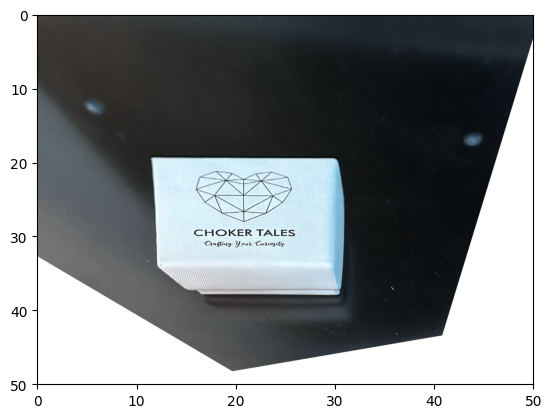

In [98]:
# Apply projective transformation.
source = np.float32(original_points_source)
destination = np.float32(original_points_destination)
M = cv.getPerspectiveTransform(source, destination)
h, w = originalImage.shape[:2]
correctedImage = cv.warpPerspective(originalImage, M, (w, h), borderValue=(255, 255, 255))
plt.imshow(correctedImage, aspect = "auto", extent = [0, 50, 50, 0])

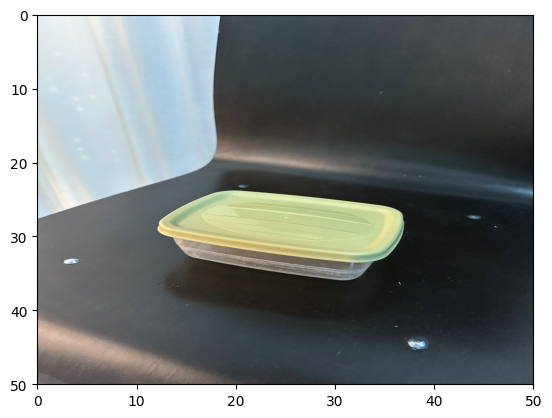

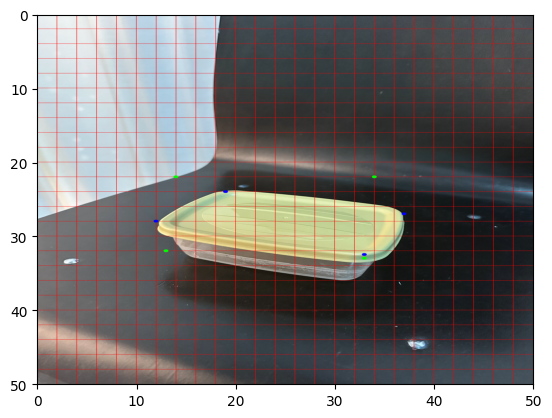

In [152]:
#Image 3
imageFile = "IMG_1926.jpg"

# Initially I set these points to (0,0) to visualise the image first and gradually change values/co-ordinates to my needs
msp1 = (19, 24)
msp2 = (37, 27)
msp3 = (12, 28)
msp4 = (33, 32.5)

mySourcePoints = [msp1, msp2, msp3, msp4]

mdp1 = (14, 22)
mdp2 = (34, 22)
mdp3 = (13, 32)
mdp4 = (33, 33)

myDestinationPoints = [mdp1, mdp2, mdp3, mdp4]

pointsImage, originalImage, original_points_source, original_points_destination = addPoints(imageFile, mySourcePoints, myDestinationPoints)

plt.imshow(originalImage, aspect = "auto", extent = [0, 50, 50, 0])
plt.figure()
plt.imshow(pointsImage, aspect = "auto", extent = [0, 50, 50, 0])

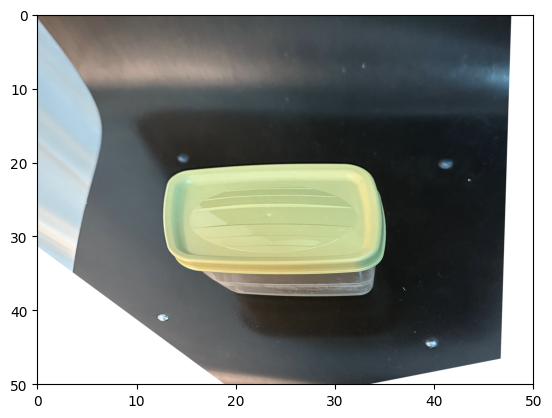

In [126]:
# Apply projective transformation.
source = np.float32(original_points_source)
destination = np.float32(original_points_destination)
M = cv.getPerspectiveTransform(source, destination)
h, w = originalImage.shape[:2]
correctedImage = cv.warpPerspective(originalImage, M, (w, h), borderValue=(255, 255, 255))
plt.imshow(correctedImage, aspect = "auto", extent = [0, 50, 50, 0])

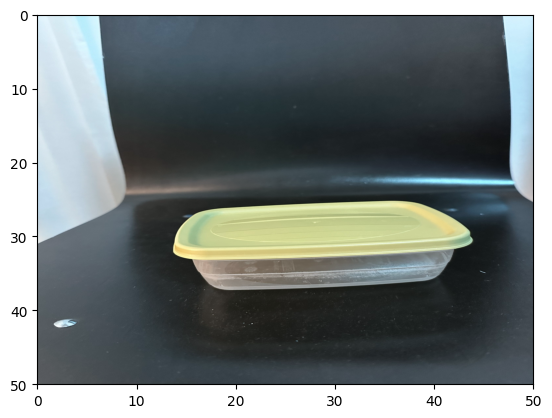

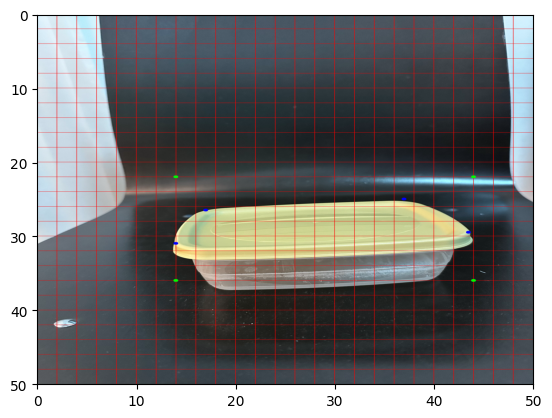

In [153]:
#Image 4
imageFile = "IMG_1927.jpg"

# Initially I set these points to (0,0) to visualise the image first and gradually change values/co-ordinates to my needs
msp1 = (17, 26.5)
msp2 = (37, 25)
msp3 = (14, 31)
msp4 = (43.5, 29.5)

mySourcePoints = [msp1, msp2, msp3, msp4]

mdp1 = (14, 22)
mdp2 = (44, 22)
mdp3 = (14, 36)
mdp4 = (44, 36)

myDestinationPoints = [mdp1, mdp2, mdp3, mdp4]

pointsImage, originalImage, original_points_source, original_points_destination = addPoints(imageFile, mySourcePoints, myDestinationPoints)

plt.imshow(originalImage, aspect = "auto", extent = [0, 50, 50, 0])
plt.figure()
plt.imshow(pointsImage, aspect = "auto", extent = [0, 50, 50, 0])

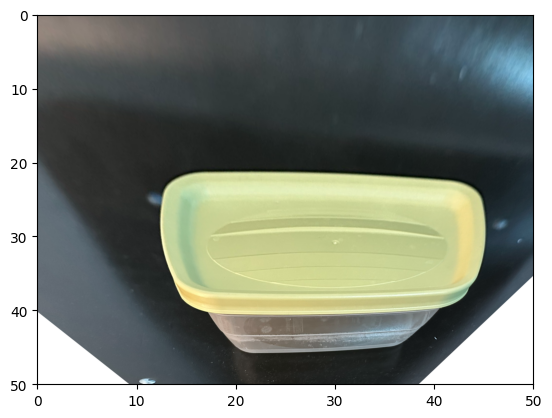

In [128]:
# Apply projective transformation.
source = np.float32(original_points_source)
destination = np.float32(original_points_destination)
M = cv.getPerspectiveTransform(source, destination)
h, w = originalImage.shape[:2]
correctedImage = cv.warpPerspective(originalImage, M, (w, h), borderValue=(255, 255, 255))
plt.imshow(correctedImage, aspect = "auto", extent = [0, 50, 50, 0])

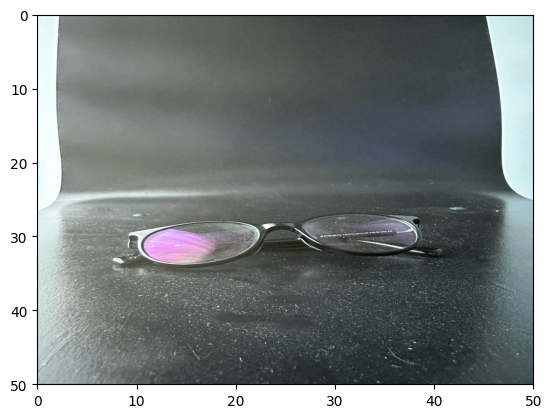

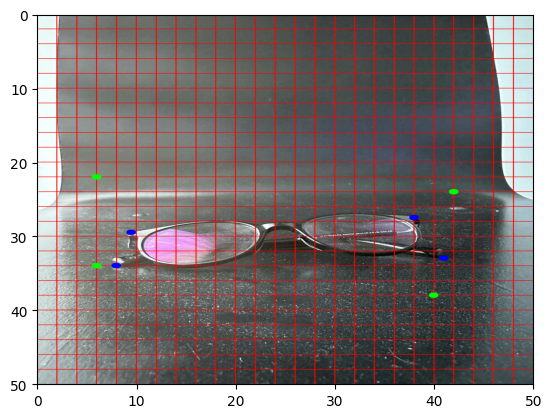

In [147]:
#Image 5
imageFile = "IMG_11.jpg"

# Initially I set these points to (0,0) to visualise the image first and gradually change values/co-ordinates to my needs
msp1 = (9.5, 29.5)
msp2 = (38, 27.5)
msp3 = (8, 34)
msp4 = (41, 33)

mySourcePoints = [msp1, msp2, msp3, msp4]

mdp1 = (6, 22)
mdp2 = (42, 24)
mdp3 = (6, 34)
mdp4 = (40, 38)

myDestinationPoints = [mdp1, mdp2, mdp3, mdp4]

pointsImage, originalImage, original_points_source, original_points_destination = addPoints(imageFile, mySourcePoints, myDestinationPoints)

plt.imshow(originalImage, aspect = "auto", extent = [0, 50, 50, 0])
plt.figure()
plt.imshow(pointsImage, aspect = "auto", extent = [0, 50, 50, 0])

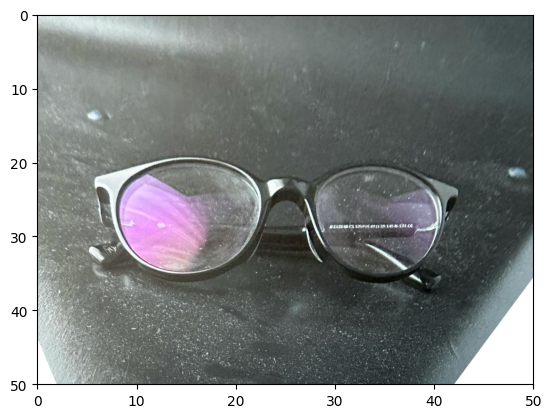

In [138]:
# Apply projective transformation.
source = np.float32(original_points_source)
destination = np.float32(original_points_destination)
M = cv.getPerspectiveTransform(source, destination)
h, w = originalImage.shape[:2]
correctedImage = cv.warpPerspective(originalImage, M, (w, h), borderValue=(255, 255, 255))
plt.imshow(correctedImage, aspect = "auto", extent = [0, 50, 50, 0])

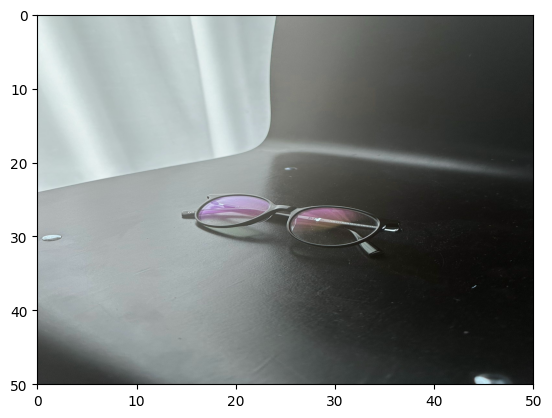

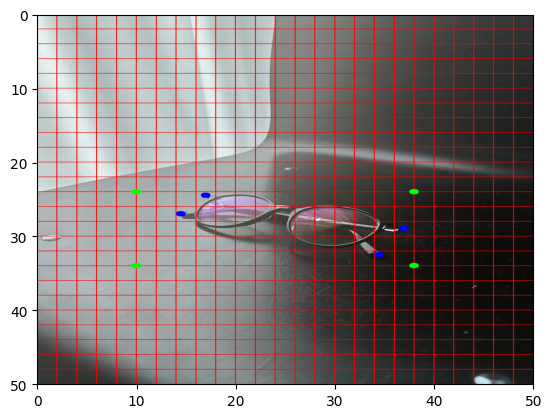

In [163]:
#Image 6
imageFile = "IMG_12.jpg"

# Initially I set these points to (0,0) to visualise the image first and gradually change values/co-ordinates to my needs
msp1 = (17, 24.5)
msp2 = (37, 29)
msp3 = (14.5, 27)
msp4 = (34.5, 32.5)

mySourcePoints = [msp1, msp2, msp3, msp4]

mdp1 = (10, 24)
mdp2 = (38, 24)
mdp3 = (10, 34)
mdp4 = (38, 34)

myDestinationPoints = [mdp1, mdp2, mdp3, mdp4]

pointsImage, originalImage, original_points_source, original_points_destination = addPoints(imageFile, mySourcePoints, myDestinationPoints)

plt.imshow(originalImage, aspect = "auto", extent = [0, 50, 50, 0])
plt.figure()
plt.imshow(pointsImage, aspect = "auto", extent = [0, 50, 50, 0])

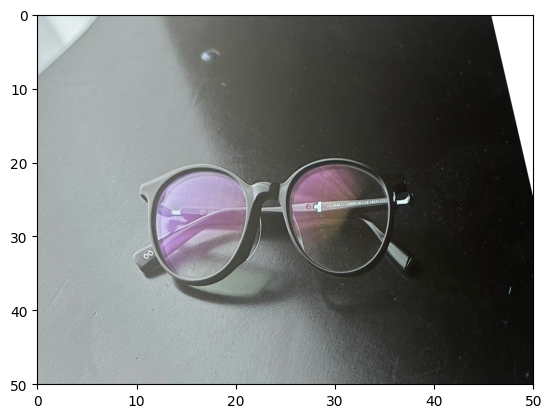

In [164]:
# Apply projective transformation.
source = np.float32(original_points_source)
destination = np.float32(original_points_destination)
M = cv.getPerspectiveTransform(source, destination)
h, w = originalImage.shape[:2]
correctedImage = cv.warpPerspective(originalImage, M, (w, h), borderValue=(255, 255, 255))
plt.imshow(correctedImage, aspect = "auto", extent = [0, 50, 50, 0])

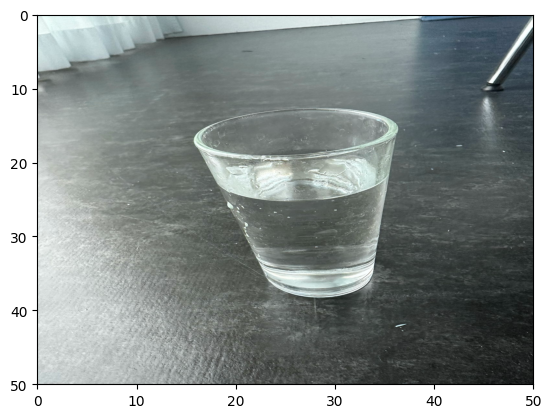

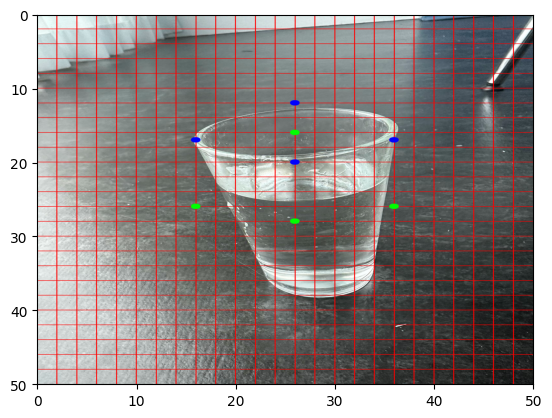

In [187]:
#Image 7
imageFile = "IMG_13.jpg"

# Initially I set these points to (0,0) to visualise the image first and gradually change values/co-ordinates to my needs
msp1 = (16, 17)
msp2 = (26, 12)
msp3 = (36, 17)
msp4 = (26, 20)

mySourcePoints = [msp1, msp2, msp3, msp4]

mdp1 = (16, 26)
mdp2 = (26, 16)
mdp3 = (36, 26)
mdp4 = (26, 28)

myDestinationPoints = [mdp1, mdp2, mdp3, mdp4]

pointsImage, originalImage, original_points_source, original_points_destination = addPoints(imageFile, mySourcePoints, myDestinationPoints)

plt.imshow(originalImage, aspect = "auto", extent = [0, 50, 50, 0])
plt.figure()
plt.imshow(pointsImage, aspect = "auto", extent = [0, 50, 50, 0])

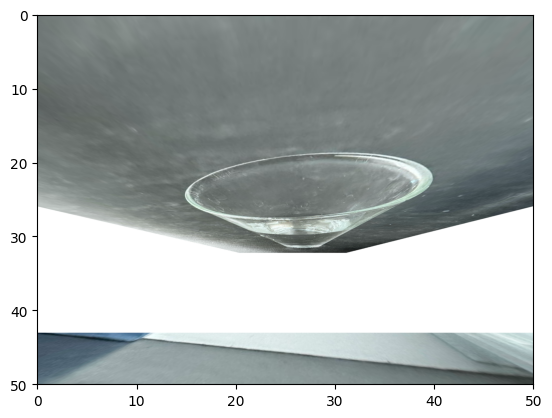

In [188]:
# Apply projective transformation.
source = np.float32(original_points_source)
destination = np.float32(original_points_destination)
M = cv.getPerspectiveTransform(source, destination)
h, w = originalImage.shape[:2]
correctedImage = cv.warpPerspective(originalImage, M, (w, h), borderValue=(255, 255, 255))
plt.imshow(correctedImage, aspect = "auto", extent = [0, 50, 50, 0])

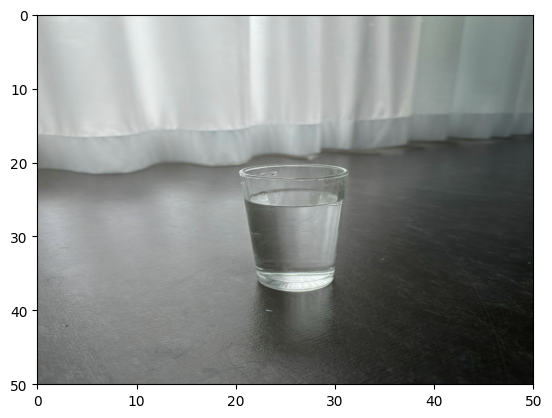

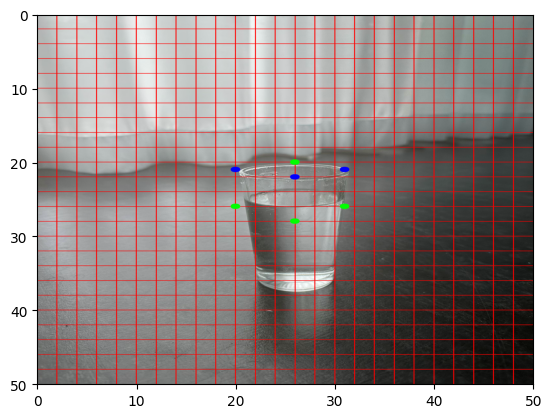

In [203]:
#Image 8
imageFile = "IMG_14.jpg"

# Initially I set these points to (0,0) to visualise the image first and gradually change values/co-ordinates to my needs
msp1 = (20, 21)
msp2 = (26, 20)
msp3 = (31, 21)
msp4 = (26, 22)

mySourcePoints = [msp1, msp2, msp3, msp4]

mdp1 = (20, 26)
mdp2 = (26, 20)
mdp3 = (31, 26)
mdp4 = (26, 28)

myDestinationPoints = [mdp1, mdp2, mdp3, mdp4]

pointsImage, originalImage, original_points_source, original_points_destination = addPoints(imageFile, mySourcePoints, myDestinationPoints)

plt.imshow(originalImage, aspect = "auto", extent = [0, 50, 50, 0])
plt.figure()
plt.imshow(pointsImage, aspect = "auto", extent = [0, 50, 50, 0])

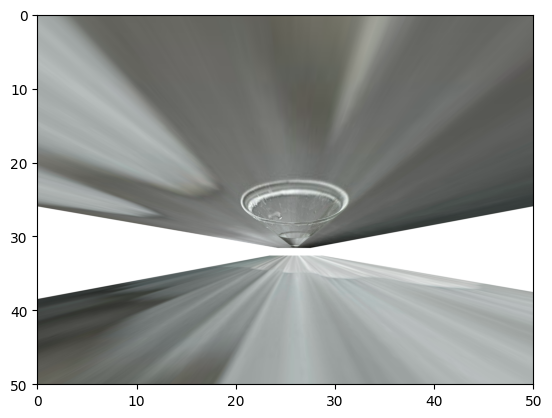

In [204]:
# Apply projective transformation.
source = np.float32(original_points_source)
destination = np.float32(original_points_destination)
M = cv.getPerspectiveTransform(source, destination)
h, w = originalImage.shape[:2]
correctedImage = cv.warpPerspective(originalImage, M, (w, h), borderValue=(255, 255, 255))
plt.imshow(correctedImage, aspect = "auto", extent = [0, 50, 50, 0])

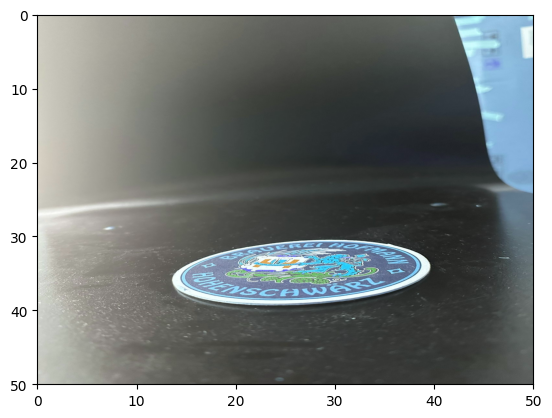

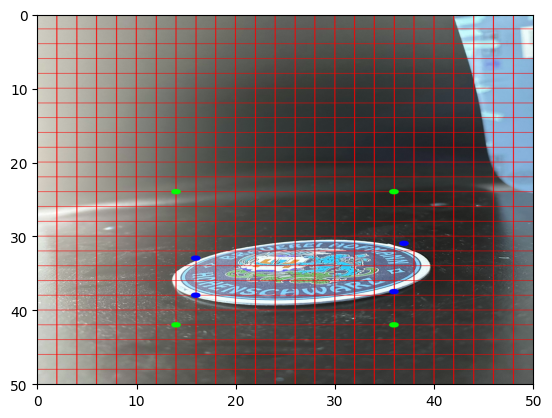

In [253]:
#Image 9
imageFile = "IMG_15.jpg"

# Initially I set these points to (0,0) to visualise the image first and gradually change values/co-ordinates to my needs
msp1 = (16, 33)
msp2 = (37, 31)
msp3 = (16, 38)
msp4 = (36, 37.5)

mySourcePoints = [msp1, msp2, msp3, msp4]

mdp1 = (14, 24)
mdp2 = (36, 24)
mdp3 = (14, 42)
mdp4 = (36, 42)

myDestinationPoints = [mdp1, mdp2, mdp3, mdp4]

pointsImage, originalImage, original_points_source, original_points_destination = addPoints(imageFile, mySourcePoints, myDestinationPoints)

plt.imshow(originalImage, aspect = "auto", extent = [0, 50, 50, 0])
plt.figure()
plt.imshow(pointsImage, aspect = "auto", extent = [0, 50, 50, 0])

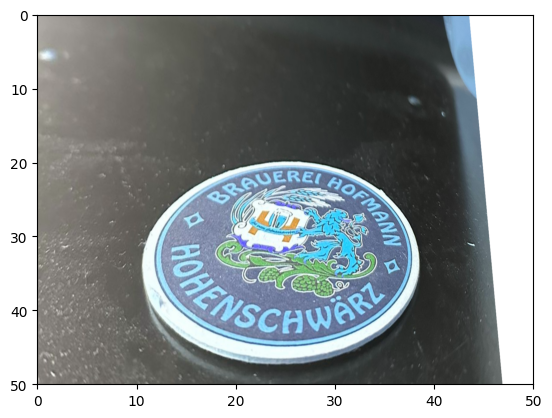

In [254]:
# Apply projective transformation.
source = np.float32(original_points_source)
destination = np.float32(original_points_destination)
M = cv.getPerspectiveTransform(source, destination)
h, w = originalImage.shape[:2]
correctedImage = cv.warpPerspective(originalImage, M, (w, h), borderValue=(255, 255, 255))
plt.imshow(correctedImage, aspect = "auto", extent = [0, 50, 50, 0])

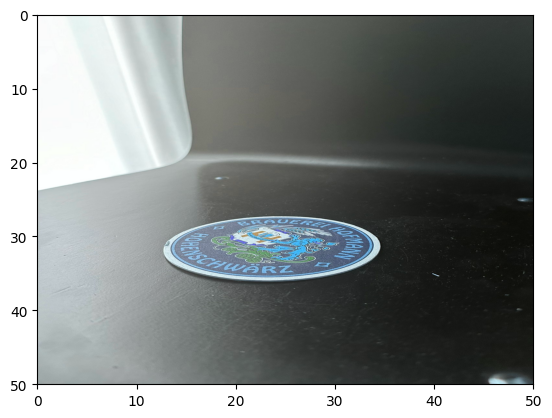

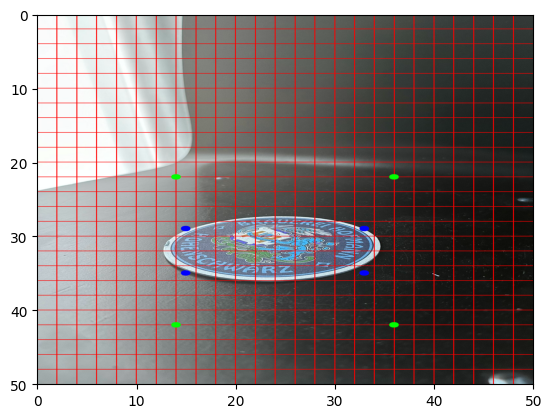

In [258]:
#Image 10
imageFile = "IMG_16.jpg"

# Initially I set these points to (0,0) to visualise the image first and gradually change values/co-ordinates to my needs
msp1 = (15, 29)
msp2 = (33, 29)
msp3 = (15, 35)
msp4 = (33, 35)

mySourcePoints = [msp1, msp2, msp3, msp4]

mdp1 = (14, 22)
mdp2 = (36, 22)
mdp3 = (14, 42)
mdp4 = (36, 42)

myDestinationPoints = [mdp1, mdp2, mdp3, mdp4]

pointsImage, originalImage, original_points_source, original_points_destination = addPoints(imageFile, mySourcePoints, myDestinationPoints)

plt.imshow(originalImage, aspect = "auto", extent = [0, 50, 50, 0])
plt.figure()
plt.imshow(pointsImage, aspect = "auto", extent = [0, 50, 50, 0])

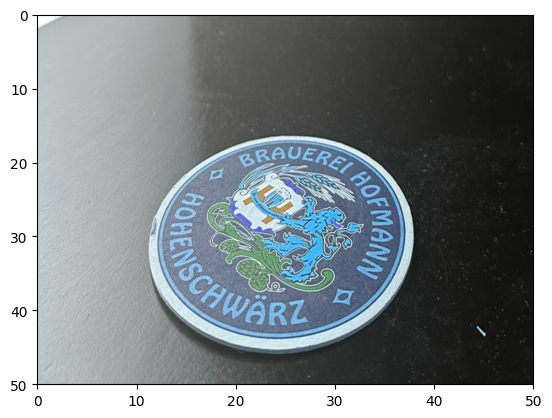

In [259]:
# Apply projective transformation.
source = np.float32(original_points_source)
destination = np.float32(original_points_destination)
M = cv.getPerspectiveTransform(source, destination)
h, w = originalImage.shape[:2]
correctedImage = cv.warpPerspective(originalImage, M, (w, h), borderValue=(255, 255, 255))
plt.imshow(correctedImage, aspect = "auto", extent = [0, 50, 50, 0])